In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\kilar\\Documents\\data\\mergedata1.csv")

In [3]:
data

,Unnamed: 0,web-scraper-start-url,Books,Books-href,Author,Abstract,category,views
0,0,"https://www.bookrix.com/books;true-crime,id:51...",The Poisoned Pen,https://www.bookrix.com/_ebook-arthur-b-reeve-...,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",True Crime,3
1,1,"https://www.bookrix.com/books;true-crime,id:51...",The History Of A Crime (fiscle part- 4) The Te...,https://www.bookrix.com/_ebook-victor-hugo-the...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",True Crime,3
2,2,"https://www.bookrix.com/books;true-crime,id:51...",Grimshaw Mysteries,https://www.bookrix.com/_ebook-kyler-james-gri...,Kyler James,Rick grimshaw is an old school detective in a ...,True Crime,646
3,3,"https://www.bookrix.com/books;true-crime,id:51...",Maiwa's Revenge,https://www.bookrix.com/_ebook-h-rider-haggard...,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",True Crime,5
4,4,"https://www.bookrix.com/books;true-crime,id:51...",Little Too Obsessed,https://www.bookrix.com/_ebook-ashley-arble-li...,Ashley Arble,"Danika, a young teenager, can't wait to have k...",True Crime,3701
...,...,...,...,...,...,...,...,...
349,58,https://www.bookrix.com/books;language-literat...,Kate Chopin - Short Stories,https://www.bookrix.com/_ebook-kalai-selvi-ari...,Kalai Selvi Arivalagan,"In her stories, Kate Chopin portrays women who...",Language & Literature,57
350,59,https://www.bookrix.com/books;language-literat...,Call of the Wild - a Review,https://www.bookrix.com/_ebook-kalai-selvi-ari...,Kalai Selvi Arivalagan,“The Call of the Wild” was first published in ...,Language & Literature,39
351,60,https://www.bookrix.com/books;language-literat...,"Elson Grammer School Literature, Book Four (Fi...",https://www.bookrix.com/_ebook-william-h-elson...,William H. Elson And Christine Keck,Paul Revere's Ride\n\n\n\n\n\n\n\nHenry Wadswo...,Language & Literature,6
352,61,https://www.bookrix.com/books;language-literat...,The Many Pieces of Me,https://www.bookrix.com/_ebook-heather-semon-t...,Heather Semon,"After reading through this book, you will unde...",Language & Literature,4739


In [4]:
data.shape

(354, 8)

# Data Cleaning


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             354 non-null    int64 
 1   web-scraper-start-url  354 non-null    object
 2   Books                  354 non-null    object
 3   Books-href             354 non-null    object
 4   Author                 354 non-null    object
 5   Abstract               354 non-null    object
 6   category               354 non-null    object
 7   views                  354 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 22.2+ KB


In [6]:
data1=data.drop(columns=['Unnamed: 0','web-scraper-start-url','Books-href','views'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
data1['category']=encoder.fit_transform(data1['category'])

In [9]:
data1.tail()

,Books,Author,Abstract,category
349,Kate Chopin - Short Stories,Kalai Selvi Arivalagan,"In her stories, Kate Chopin portrays women who...",1
350,Call of the Wild - a Review,Kalai Selvi Arivalagan,“The Call of the Wild” was first published in ...,1
351,"Elson Grammer School Literature, Book Four (Fi...",William H. Elson And Christine Keck,Paul Revere's Ride\n\n\n\n\n\n\n\nHenry Wadswo...,1
352,The Many Pieces of Me,Heather Semon,"After reading through this book, you will unde...",1
353,Cries Of The Masses,SHODIPO O.A,This book speaks about the fight for our right...,1


In [10]:
data1.isnull().sum()

Books       0
Author      0
Abstract    0
category    0
dtype: int64

In [11]:
data1.duplicated().sum()

1

In [12]:
data1=data1.drop_duplicates(keep='first')

In [13]:
data1.duplicated().sum()

0

# EDA

In [14]:
data1['category'].value_counts()

5    71
4    63
1    63
0    62
2    61
3    33
Name: category, dtype: int64

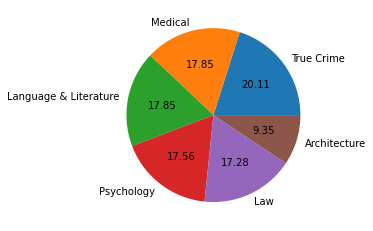

In [15]:
import matplotlib.pyplot as plt
plt.pie(data1['category'].value_counts(),labels=['True Crime','Medical','Language & Literature','Psychology','Law','Architecture'],autopct="%0.2f")
plt.show()

In [16]:
#data is imbalance
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kilar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data1['char_count']=data1['Abstract'].apply(len)
data1.head()

,Books,Author,Abstract,category,char_count
0,The Poisoned Pen,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",5,805
1,The History Of A Crime (fiscle part- 4) The Te...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",5,413
2,Grimshaw Mysteries,Kyler James,Rick grimshaw is an old school detective in a ...,5,287
3,Maiwa's Revenge,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",5,389
4,Little Too Obsessed,Ashley Arble,"Danika, a young teenager, can't wait to have k...",5,174


In [18]:
#num of words
data1['num_words']=data1['Abstract'].apply(lambda x:len(nltk.word_tokenize(x)))
data1.head()

,Books,Author,Abstract,category,char_count,num_words
0,The Poisoned Pen,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",5,805,161
1,The History Of A Crime (fiscle part- 4) The Te...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",5,413,77
2,Grimshaw Mysteries,Kyler James,Rick grimshaw is an old school detective in a ...,5,287,58
3,Maiwa's Revenge,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",5,389,76
4,Little Too Obsessed,Ashley Arble,"Danika, a young teenager, can't wait to have k...",5,174,42


In [19]:
data1['num_sentences']=data1['Abstract'].apply(lambda x:len(nltk.sent_tokenize(x)))
data1.head()

,Books,Author,Abstract,category,char_count,num_words,num_sentences
0,The Poisoned Pen,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",5,805,161,8
1,The History Of A Crime (fiscle part- 4) The Te...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",5,413,77,4
2,Grimshaw Mysteries,Kyler James,Rick grimshaw is an old school detective in a ...,5,287,58,4
3,Maiwa's Revenge,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",5,389,76,3
4,Little Too Obsessed,Ashley Arble,"Danika, a young teenager, can't wait to have k...",5,174,42,5


In [20]:
data1[['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,353.000000,353.000000,353.000000
mean,463.662890,89.028329,3.631728
std,409.557629,73.968584,3.057277
min,12.000000,2.000000,1.000000
25%,217.000000,43.000000,2.000000
50%,353.000000,70.000000,3.000000
75%,555.000000,103.000000,4.000000
max,4014.000000,571.000000,29.000000


In [21]:
#True crime
data1[data1['category']==5][['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,71.000000,71.000000,71.00000
mean,392.056338,81.295775,3.71831
std,313.340157,68.902290,3.95396
min,38.000000,7.000000,1.00000
25%,162.000000,32.000000,2.00000
50%,297.000000,60.000000,3.00000
75%,500.500000,99.000000,4.00000
max,1637.000000,407.000000,29.00000


In [22]:
#language and literature
data1[data1['category']==1][['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,63.000000,63.000000,63.000000
mean,499.777778,91.269841,3.476190
std,517.693908,69.917280,2.284994
min,52.000000,9.000000,1.000000
25%,272.500000,53.000000,2.000000
50%,405.000000,78.000000,3.000000
75%,542.000000,101.000000,4.000000
max,4014.000000,486.000000,14.000000


In [23]:
#law
data1[data1['category']==4][['char_count','num_words','num_sentences']].describe()

,char_count,num_words,num_sentences
count,63.000000,63.000000,63.000000
mean,366.539683,71.142857,3.206349
std,306.375419,60.017163,2.622230
min,12.000000,2.000000,1.000000
25%,167.500000,32.000000,1.000000
50%,305.000000,56.000000,2.000000
75%,414.500000,88.000000,4.000000
max,1591.000000,302.000000,11.000000


#  Visualization

<AxesSubplot:xlabel='char_count', ylabel='Count'>

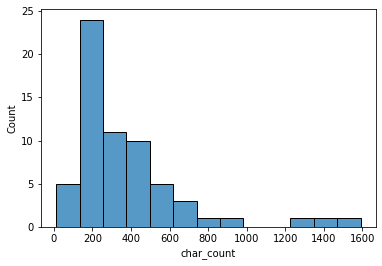

In [24]:
sns.histplot(data1[data1['category']==4]['char_count'])

<AxesSubplot:xlabel='char_count', ylabel='Count'>

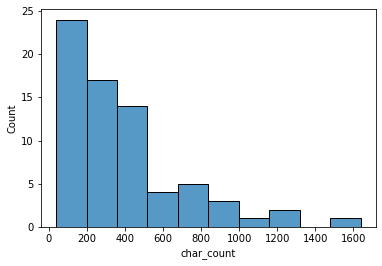

In [25]:
sns.histplot(data1[data1['category']==5]['char_count'])

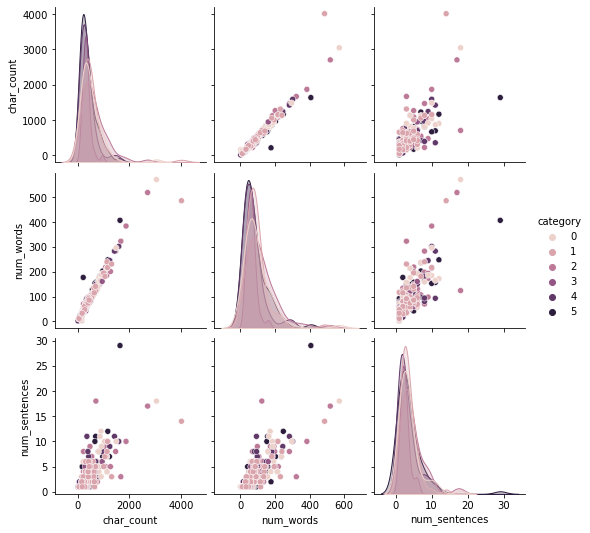

In [26]:
sns.pairplot(data1,hue='category')

<AxesSubplot:>

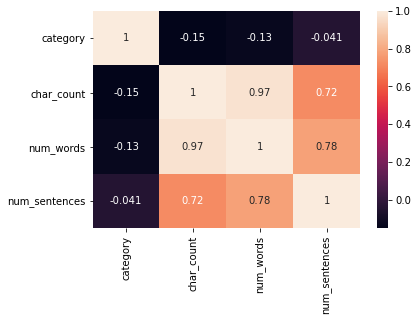

In [27]:
sns.heatmap(data1.corr(),annot=True)

# Data Preprocessing

In [28]:
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


def transform_text(text):
    text=text.lower()   #lower
    text=nltk.word_tokenize(text) #tokenize 
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
           
    text=y[:]  
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:   #Removing StopWords
            y.append(i)
         
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))   #Stemming
    
    return " ".join(y)

In [29]:
data1['transformed_text']=data1['Abstract'].apply(transform_text)
data1.head()

,Books,Author,Abstract,category,char_count,num_words,num_sentences,transformed_text
0,The Poisoned Pen,Arthur B. Reeve,"Kennedy's Suit-Case Was Lying Open On The Bed,...",5,805,161,8,kennedi lie open bed liter throw thing chiffon...
1,The History Of A Crime (fiscle part- 4) The Te...,Victor Hugo,"On December 1, 1851, Charras[1] Shrugged his S...",5,413,77,4,decemb 1 1851 charra 1 shrug shoulder unload p...
2,Grimshaw Mysteries,Kyler James,Rick grimshaw is an old school detective in a ...,5,287,58,4,rick grimshaw old school detect new world tech...
3,Maiwa's Revenge,H. Rider Haggard,"Sir Henry Rider Haggard, KBE (/ˈhæɡərd/; 22 Ju...",5,389,76,3,sir henri rider haggard kbe 22 june 1856 14 ma...
4,Little Too Obsessed,Ashley Arble,"Danika, a young teenager, can't wait to have k...",5,174,42,5,danika young teenag ca wait kid buy babi doll ...


In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

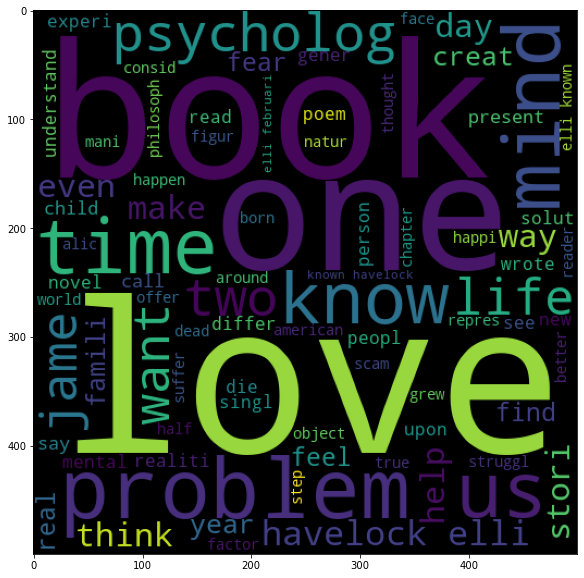

In [31]:
law_wc=wc.generate(data1[data1['category']==4]['transformed_text'].str.cat(sep=""))
plt.figure(figsize=(20,10))
plt.imshow(law_wc)

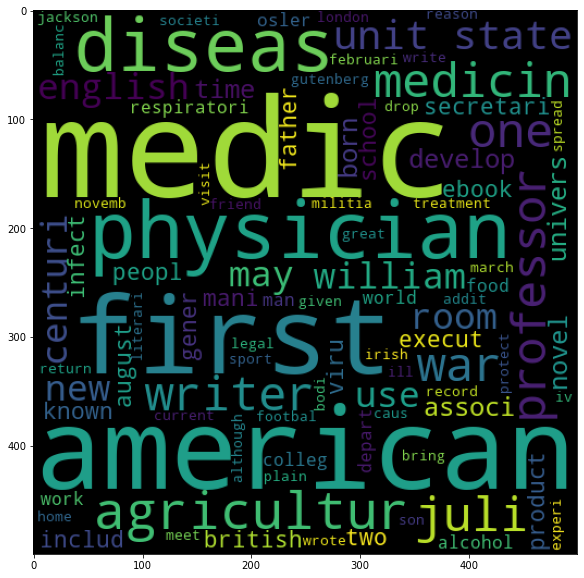

In [32]:
medical_wc=wc.generate(data1[data1['category']==3]['transformed_text'].str.cat(sep=""))
plt.figure(figsize=(20,10))
plt.imshow(medical_wc)

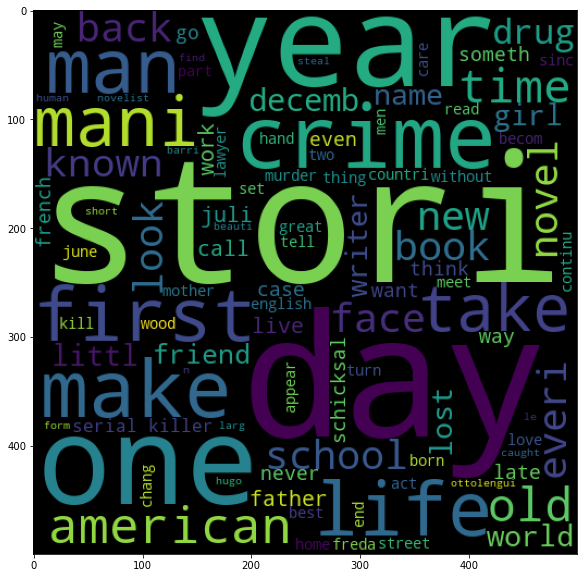

In [33]:
true_crime_wc=wc.generate(data1[data1['category']==5]['transformed_text'].str.cat(sep=""))
plt.figure(figsize=(20,10))
plt.imshow(true_crime_wc)

In [34]:
medical_corpus=[]
for msg in data1[data1['category']==3]['transformed_text'].tolist():
    for word in msg.split():
        medical_corpus.append(word)

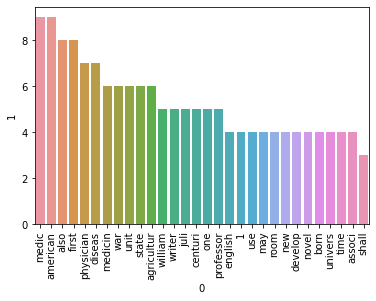

In [35]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(medical_corpus).most_common(30))[0],pd.DataFrame(Counter(medical_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
true_crime_corpus=[]
for msg in data1[data1['category']==5]['transformed_text'].tolist():
    for word in msg.split():
        true_crime_corpus.append(word)

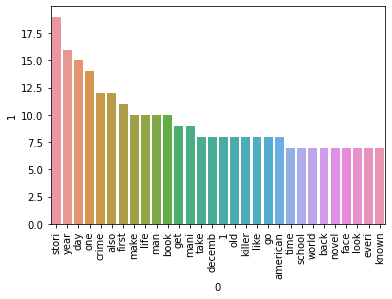

In [37]:
sns.barplot(pd.DataFrame(Counter(true_crime_corpus).most_common(30))[0],pd.DataFrame(Counter(true_crime_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

#  For Imbalance Data set 

In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer()

In [81]:
X=vectorizer.fit_transform(data1['transformed_text'])

In [82]:
X.shape

(353, 4663)

In [83]:
y=data1['category'].values
y

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=6,random_state=2)

# Doing for Balancing by using SMOTE [Synthetic Minority Oversampling Technique]

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
smt=SMOTE()
X_train1,y_train1=smt.fit_resample(X_train,y_train)
X_test1,y_test1=smt.fit_resample(X_test,y_test)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6